# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd

df = pd.read_csv('human_body_temperature.csv')

# 1

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
import numpy as np
df_mean = np.mean(df)
df_sd = np.sqrt(np.var(df))

In [4]:
df_mean

temperature    98.249231
heart_rate     73.761538
dtype: float64

In [5]:
df_sd

temperature    0.730358
heart_rate     7.034862
dtype: float64

In [6]:
#generate random normal variable with sample size 1000
body_temp = np.random.normal(98.2 , 0.73,size=10000)

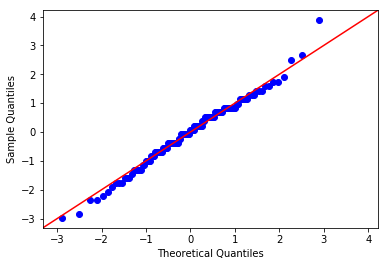

In [65]:
#use qqplot to check for normality of distribution:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
fig = sm.qqplot(df['temperature'],stats.t,fit=True,line='45')
plt.show()


Since the qqplot indicates a straight line between the sample quantiles and. the theoretical quantiles, it indicates that it is normal distribution.

In [31]:
"""#define ECDF: where x is the input data for the x-variables and
y is the cumulative distribution function.
"""
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    return x,y

In [9]:
#or use ecdf method:
x_temp,y_temp = ecdf(df['temperature'])
x_sample_temp,y_sample_temp = ecdf(body_temp)

plt.plot(x_temp,y_temp,marker='.',linestyle='none')
plt.plot(x_sample_temp,y_sample_temp,marker='.',linestyle='none')
plt.xlabel('body temperature')
plt.ylabel('ecdf')

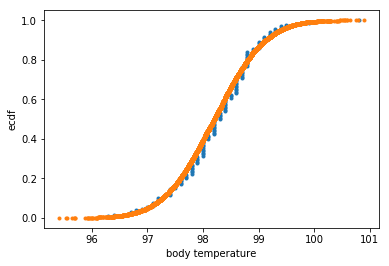

In [10]:
plt.show()

Since the original dataframe' data and the sample's data lies above each other, it indicates that they have normal distribution.

# 2

In [11]:
#find out how many observations we have:
df.shape

(130, 3)

Since we have 130 rows and 3 columns, it indicates that our observation is greater than 30, indicating that we have a large sample dataset.

The observations are independent since one person's body temperature does not depend on another person's body temperature. A dependent case would be when the blood pressure of a person is taken before and after an injection is given since it is taken from the same sample. In this case it is independent since the temperature is taken from all different samples.

# 3

Ho: mu = 98.6

Ha: mu not equal to 98.6

based on this hypothesis, I would be conducting a two-tailed z-test since I want my alternative hypothesis to be mu greater than 98.6 or less than 98.6 and Z-test because my observations are greater than 30, which is 130.

In [58]:
n = len(df['temperature']) #find out the sample size
z_stats = (np.mean(df['temperature']) - 98.6)/np.sqrt(np.var(df['temperature'])/n)
#figure out how far away the sample z_stats is from -1.96 or 1.96 to then find out the p value
z_stats

-5.4759252020781162

In [59]:
#figure out the p-value to find out if 98.6 is really the mean
p=stats.norm.cdf(z_stats)

In [60]:
#multiply by two since it is a two-tailed test
p*2

4.3523151658821886e-08

since the p value at 5% level is smaller than 0.05, we can see that temperature is  significantly different from 98.6, indicating that the mean temperature is not 98.6. 

In [72]:
# using t-test to figure out if 98.6 is the mean temperature
n = len(df['temperature'])
t_stats = (np.mean(df['temperature'])-98.6)/np.sqrt(np.var(df['temperature'])/n)
p_t = stats.t.cdf(t_stats,np.mean(df['temperature']))

In [73]:
p_t*2

3.3450548175402467e-07

If we have used the t-test this would still have the same conclusion if it were tested based on the 5% significance level, which is the mean temperature is statistically significantly different from the mean 98.6

# 4

In [57]:
#compute margin of error at 5% significance level: 
margin_error = 1.96*np.sqrt(np.var(df['temperature'])/n)
mean_temp = np.mean(df['temperature'])
temp_outlier = [(mean_temp-margin_error),(mean_temp+margin_error)]
temp_outlier

[98.123679804428193, 98.374781734033363]

Based on the code above, we can see that a temperature below 98.12 or a temperature above 98.37 is considered abnormal based on the confidence interval at 5% confidence level

# 5

In [19]:
#is there significance different between male and female temp?
male = df.gender == 'M'
female = df.gender =='F'

In [50]:
df_male = df[male]['temperature']
df_female = df[female]['temperature']
n_male = len(df_male)
n_female = len(df_female)
diff_mean = np.mean(df_male) - np.mean(df_female)

In [51]:
z_diff = (diff_mean - 0)/np.sqrt(np.var(df_male)/n_male + np.var(df_female)/n_female)

In [52]:
z_diff

-2.3032202891940123

In [53]:
p_diff = stats.norm.cdf(z_diff)

In [54]:
p_diff*2

0.021266451830129349

this indicates that there is average temperature difference between male and female since as we can see the p value of 0.02 is so much smaller than 0.05. 